In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Gopal\OneDrive\Desktop\Layoff 2022 project\layoffs.csv")

In [3]:
df.shape

(1584, 9)

In [4]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Protocol,SF Bay Area,Media,60.0,1.00,2022-11-15,Acquired,United States,NaN
1,Asana,SF Bay Area,Other,NaN,0.09,2022-11-15,IPO,United States,453.0
2,Sema4,Stamford,Healthcare,500.0,NaN,2022-11-14,IPO,United States,791.0
3,Pipedrive,Tallin,Sales,143.0,0.15,2022-11-14,Private Equity,Estonia,90.0
4,Intercom,SF Bay Area,Support,124.0,0.13,2022-11-14,Series D,United States,240.0


In [5]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         447
percentage_laid_off    528
date                     0
stage                    4
country                  0
funds_raised           104
dtype: int64

In [6]:
df.fillna(0,inplace=True)

In [7]:
df.shape

(1584, 9)

<AxesSubplot:>

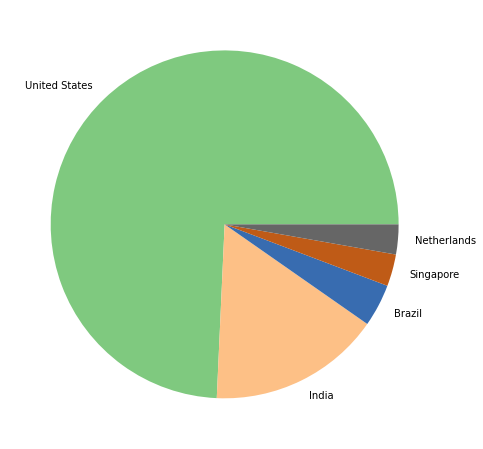

In [8]:
## Top Five countries affected by layoffs
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie',stacked=True, colormap='Accent')

<AxesSubplot:>

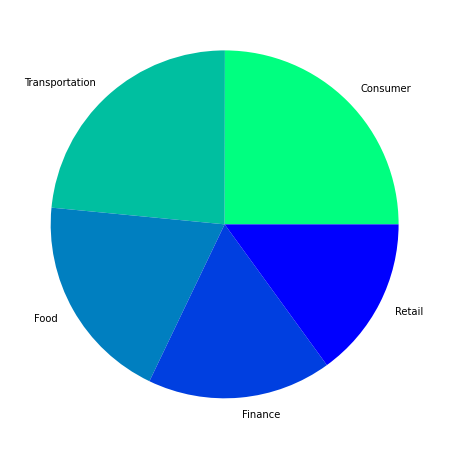

In [9]:
## Top five findustries affeacted by layoffs world wide
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True, colormap="winter_r")

<AxesSubplot:>

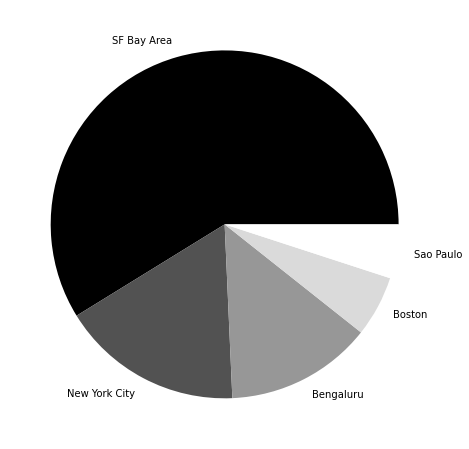

In [10]:
## Top five locations affected by layoffs world wide
df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True, colormap="Greys_r")

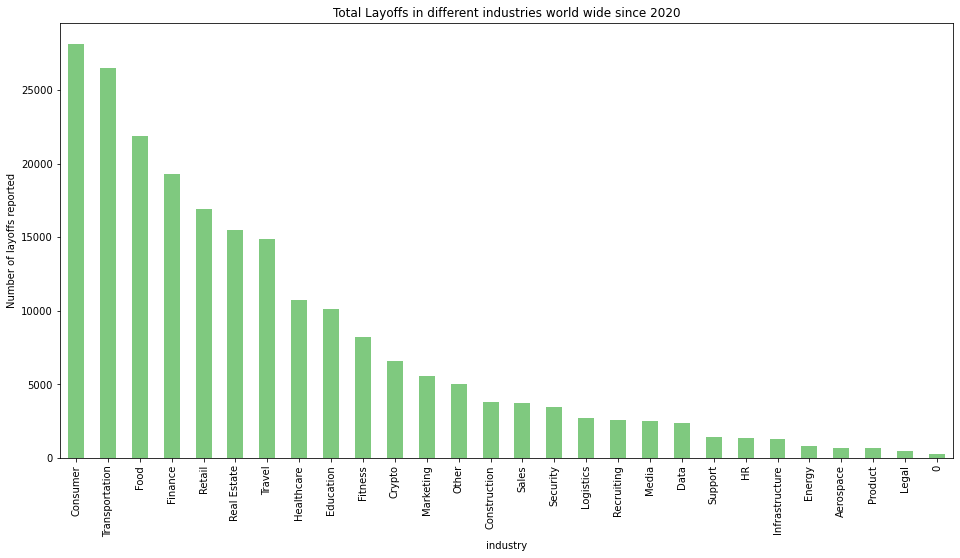

In [11]:
plt.figure(figsize=(10,6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked =True, colormap='Accent')

In [12]:
df = df.set_index('date')
df_2022 = df.loc[:'2022']
df_2021 = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]


In [13]:
df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000.0,0.13,IPO,United States,26000.0
2022-05-25,Getir,Istanbul,Food,4480.0,0.14,Series E,Turkey,1800.0
2022-11-04,Twitter,SF Bay Area,Consumer,3700.0,0.50,IPO,United States,12900.0
2022-03-08,Better.com,New York City,Real Estate,3000.0,0.33,Unknown,United States,905.0
2022-02-08,Peloton,New York City,Fitness,2800.0,0.20,IPO,United States,1900.0


In [14]:
df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False)
df_2021_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2021-06-01,Katerra,SF Bay Area,Construction,2434.0,1.00,Unknown,United States,1600.0
2021-11-02,Zillow,Seattle,Real Estate,2000.0,0.25,IPO,United States,97.0
2021-01-21,Instacart,SF Bay Area,Food,1877.0,0.00,Unknown,United States,2400.0
2021-01-06,WhiteHat Jr,Mumbai,Education,1800.0,0.00,Acquired,India,11.0
2021-08-05,Bytedance,Shanghai,Consumer,1800.0,0.00,Unknown,China,9400.0


In [15]:
df_2020_most_layoffs = df_2020.sort_values(by='total_laid_off', ascending=False)
df_2020_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2020-07-30,Booking.com,Amsterdam,Travel,4375.0,0.25,Acquired,Netherlands,0.0
2020-05-06,Uber,SF Bay Area,Transportation,3700.0,0.14,IPO,United States,24700.0
2020-05-18,Uber,SF Bay Area,Transportation,3000.0,0.13,IPO,United States,24700.0
2020-04-13,Groupon,Chicago,Retail,2800.0,0.44,IPO,United States,1400.0
2020-05-05,Airbnb,SF Bay Area,Travel,1900.0,0.25,Private Equity,United States,5400.0


<AxesSubplot:title={'center':'2022 layoffs lbly industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

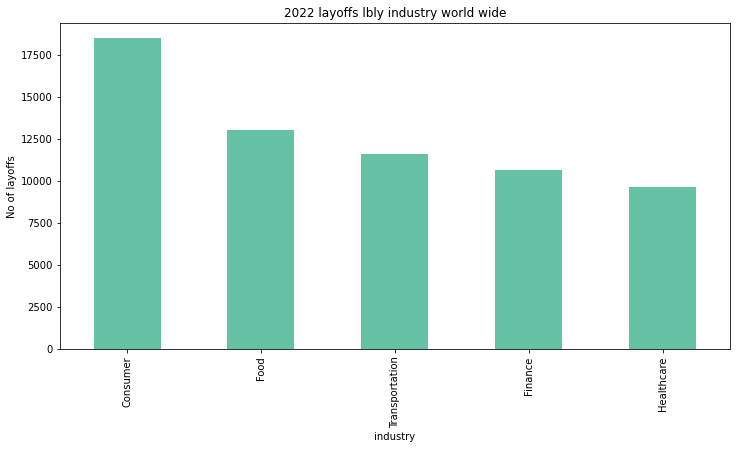

In [16]:
df_2022.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title="2022 layoffs lbly industry world wide", ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Set2')

<AxesSubplot:title={'center':'2021 layoffs lbly industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

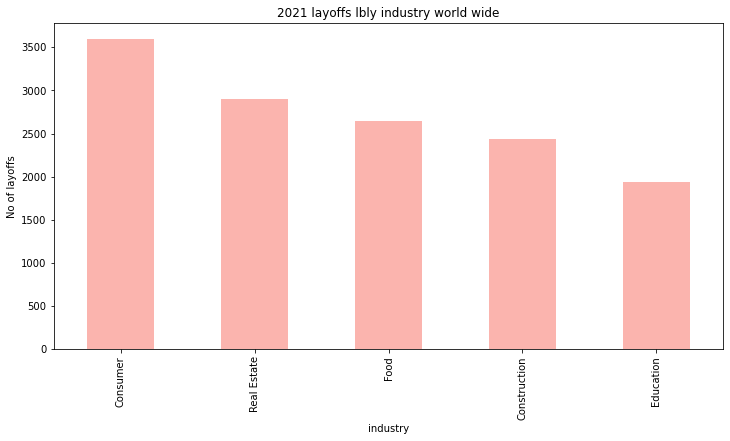

In [17]:
df_2021.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title="2021 layoffs lbly industry world wide", ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Pastel1')

<AxesSubplot:title={'center':'2020 layoffs lbly industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

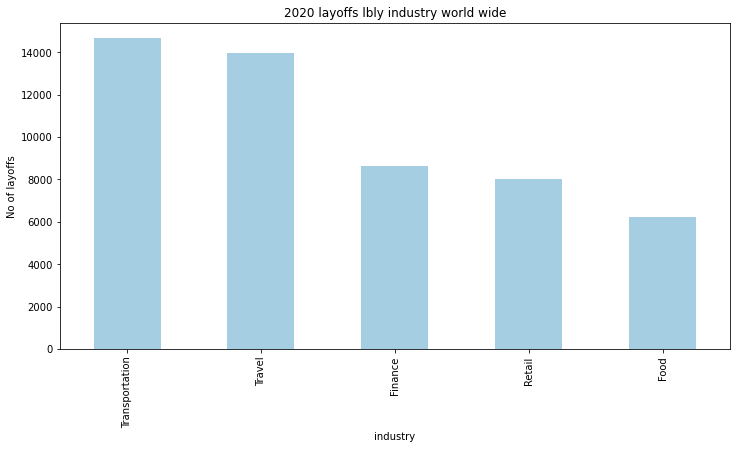

In [18]:
df_2020.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title="2020 layoffs lbly industry world wide", ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Paired')

In [19]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([df.industry, df.date.dt.year]).sum()

In [20]:
df_industry = df_industry.reset_index()

<AxesSubplot:title={'center':'Yearly layoffs in various industries world wide'}, xlabel='industry', ylabel='total_laid_off'>

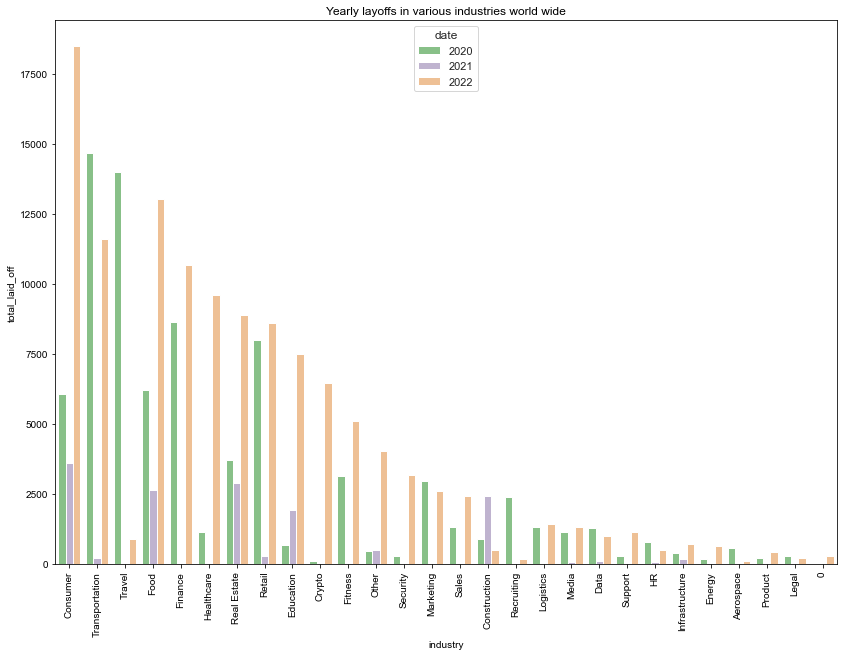

In [21]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries world wide")
sns.set(style="white", palette="Accent", color_codes=True)
sns.barplot(data=df_industry.sort_values(by=['total_laid_off', 'date'], ascending = False), x="industry", y="total_laid_off", hue="date")

In [22]:
df_india = df[df['country']=="India"]
df_minus_india=df[df['country']!="India"]

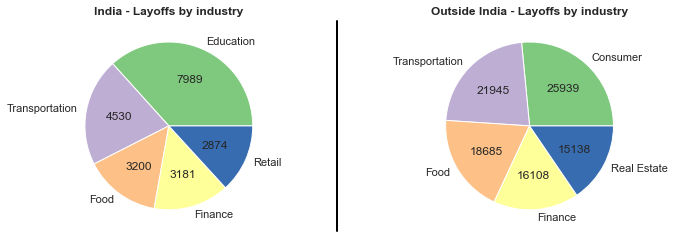

In [23]:
d1=df_india.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2=df_minus_india.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(rect=(0,0,1.7,0.9))

ax1.set_title("India - Layoffs by industry", fontweight='bold')
ax2.set_title("Outside India - Layoffs by industry", fontweight='bold')

ax1.pie(x=d1, labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2, labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

ax1.plot([1.3,1.3], [0,1], color='black', lw=2, transform= ax1.transAxes, clip_on=False)


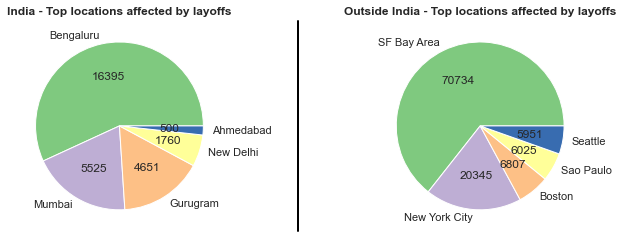

In [24]:
d1=df_india.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
d2=df_minus_india.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(rect=(0,0,1.7,0.9))

ax1.set_title("India - Top locations affected by layoffs", fontweight='bold')
ax2.set_title("Outside India - Top locations affected by layoffs", fontweight='bold')

ax1.pie(x=d1, labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2, labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

ax1.plot([1.35,1.35], [0,1], color='black', lw=2, transform= ax1.transAxes, clip_on=False)